[toc]

# Pandas 可视化探索

In [20]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = load_boston()

df = pd.DataFrame(data['data'], columns=data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


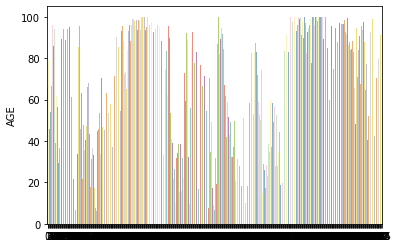

In [23]:
sns.barplot(df.index, "AGE", data = df, palette="Set3")

In [ ]:
orient="h" 水平绘制

In [26]:
sns.barplot("CrossValMeans", "Algorithm",data = cv_res, palette="Set3", orient = "h", **{'xerr':cv_std}) # 添加线

NameError: name 'cv_res' is not defined

![](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200712102127.png)

## distplot 直方图

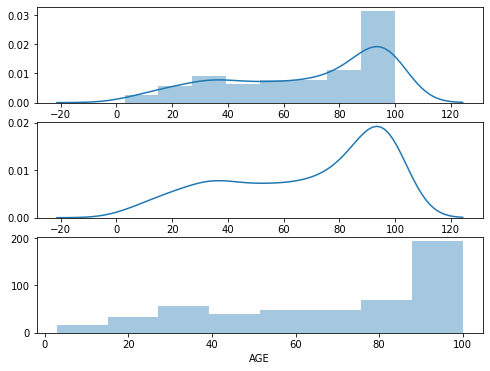

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(8,6))
sns.distplot(df['AGE'], ax=axes[0]) # 默认即绘制直方图，又绘制密度曲线
sns.distplot(df['AGE'], hist=False, ax=axes[1]) # 只绘制密度曲线
sns.distplot(df['AGE'], kde=False, ax=axes[2]) # 只绘制直方图

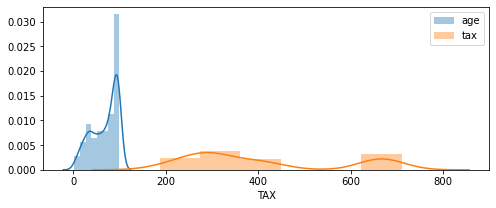

In [17]:
fig, ax = plt.subplots(figsize=(8,3))
sns.distplot(df['AGE'], ax=ax, label='age')
sns.distplot(df['TAX'], ax=ax, label='tax')
ax.legend()



## 一个离散变量

In [1]:
import seaborn as sns

sns.countplot(x="SeriousDlqin2yrs", data=df)
print("Proportion of People Who Defaulted: {}".format(df["SeriousDlqin2yrs"].sum() / len(df)))

## 一个连续变量


### 密度图

#### sns.distplot

In [ ]:
sns.distplot(df["age"])

#### sns.kdeplot

In [ ]:
sns.kdeplot(df['age'])

可以将多个变量同时绘制在一张密度图上。此时注意要先标准化，再画密度图。

In [ ]:
def normalize(x):
    mu = x.mean()
    std = x.std()
    return (x - mu) / std

df.apply(normalize).apply(sns.kdeplot)

![mult-kdeplot](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200514183824.png)

## 两个连续变量之间的关系

### 散点图

#### df.plot

In [ ]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

#### plt.scatter

In [ ]:
plt.scatter(x="SepalLengthCm", y="SepalWidthCm", data=iris)

![scatter](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200507105533.png)

### 散点图 + histogram

在散点图的基础上添加了直方图

#### sns.jointpot

In [ ]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

![jointplot](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200507105751.png)

## 两个连续变量 + 一个离散变量

在 plt.scatter 的基础上，添加一个离散变量，在图中将离散变量的值用不同的颜色标记出来

In [ ]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

![facetgrid](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200507110028.png)

## 一个连续变量一个离散变量

### 密度图

![](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200507121640.png)

### boxplot

这个用来是探究一个离散变量和一个连续变量之间的关系。

In [19]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

NameError: name 'iris' is not defined

![boxplot](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200507104831.png)

### boxplot + stripplot

In [18]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

NameError: name 'iris' is not defined

### violinplot

A violin plot combines the benefits of the previous two plots and simplifies them
 Denser regions of the data are fatter, and sparser thiner in a violin plot

In [ ]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)
plt.show())

![violinplot](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200507105202.png)   

# References
1. [Python Data Visualizations | Kaggle](https://www.kaggle.com/benhamner/python-data-visualizations)

In [ ]:
# 两个离散变量一个连续变量
ax = plt.figure(figsize=(10,4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train.dropna(), split=True)
ax.set_xlabel('Sex',size=20)
ax.set_xticklabels(['Female','male'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')